# Task 1, problem 1 в) 
## Made by Igor Sokolov from 476 group





Solve Cauchy problem 

$$y'(t)=G(t,y),   y(0)=y_0$$

having a solution with period T

$$0\leq t\leq T$$

$$T = 7.41629870920549$$

\begin{cases}
u'(t)=v(t)=f(t,u,v) \\ 
v'(t)=-u^3(t)=g(t,u,v)\\
u(0)=1\\
v(0)=0\\ 
\end{cases}

 The classical RK 4-order method, total steps: 75


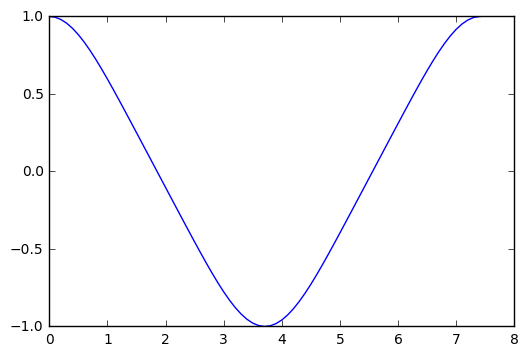

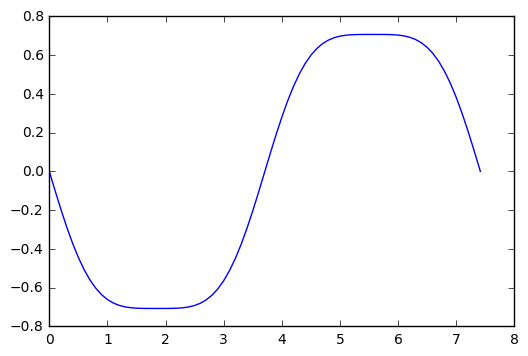

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def func_f(t, u, v):
    return v

def func_g(t, u, v):
    return -u**3

#The classical RK 4-order method
def rk4(f,g, tau, t, u, v):
    k1 = f(t, u, v)
    q1 = g(t, u, v)
    
    k2 = f(t + tau/2, u + tau/2*k1, v + tau/2*q1)
    q2 = g(t + tau/2, u + tau/2*k1, v + tau/2*q1)

    k3 = f(t + tau/2, u + tau/2*k2, v + tau/2*q2)
    q3 = g(t + tau/2, u + tau/2*k2, v + tau/2*q2)

    k4 = f(t + tau  , u + tau*k3, v + tau*q3)
    q4 = g(t + tau  , u + tau*k3, v + tau*q3)

    return u + tau * (k1 + 2*k2 + 2*k3 + k4) / 6, v + tau * (q1 + 2*q2 + 2*q3 + q4) / 6
rk4.order = 4; rk4.name = 'The classical RK 4-order method'


def fixed_stepsize(f, g, u0, v0, tmax, method, tau=0.1):
    t = 0; u = u0; v = v0
    T = [0]; U = [u0]; V = [v0] 
    name = method.name
    while t < tmax:
        # If the last step goes beyond tmax - reduce tau
        if t + tau > tmax: tau = tmax - t
        u,v = method(f,g, tau, t, u, v)
        t += tau;
        T.append(t)
        U.append(u)
        V.append(v)

    print('%s, total steps: %d'%(name, len(T)-1))
    return np.array(T), np.array(U), np.array(V)


T_max = 7.41629870920549
u_0 = 1
v_0 = 0


T,U,V = fixed_stepsize (func_f, func_g, u_0, v_0, T_max, rk4)

plt.plot(T,U)
plt.show()

plt.plot(T,V)
plt.show()


Checking the order of method

In [13]:
print np.linalg.norm( np.array([U[len(U)-1], V[len(V)-1]]) - np.array([U[0], V[0]]))

2.38990883888e-05
